In [1]:
import numpy as np
from numpy.testing import assert_almost_equal

# 顯示小數點下兩位，保持畫面簡潔
np.set_printoptions(precision=2)

# reproductivity, 讓你可以跟著重現此 demo 數據
# 我也鼓勵你實際執行範例程式碼以內化本文概念
rng = np.random.RandomState(1)
 
# 初始化實驗數據並減去平均（文後會說明為何要減去平均）
W = rng.rand(2, 2)
X_normal = rng.normal(scale=5, size=(2, 20))
X_orig = W @ X_normal  # @ 就是你學過的矩陣相乘運算
X_mean = X_orig.mean(axis=1)[:, np.newaxis]
X = X_orig - X_mean
mean = X.mean(axis=1)

# 測試 numerical 相等，確保樣本的平均已經為 0
# 這類數值測試在你需要自己實作 ML 演算法時十分重要
assert_almost_equal(0, mean)

print('X.shape:', X.shape, '\n')
print(X)

X.shape: (2, 20) 

[[ 2.89  0.32  5.8  -6.52  3.94 -4.21  0.45  2.14  1.3  -4.98 -2.4  -3.1
   0.69 -1.59 -3.64 -0.24  6.81  4.63 -2.24 -0.06]
 [ 1.52  0.91  1.52 -0.88 -0.03 -1.26 -0.25  0.96 -0.89 -0.45 -0.88 -1.12
  -0.86  0.13 -1.53  0.51  2.66  1.28 -0.14 -1.19]]


## 矩陣 X ：
- X 維度為 (n_features, n_samples)
- 每行（column）代表著一個特定的樣本 x
- 每列（row）則代表某特徵 f 的所有觀測值

In [2]:
"""
每個樣本為一個 column vector，索引從 0 開始
第一個 「 : 」 代表取得所有對應的 rows
"""
X[:, 0]

array([2.89, 1.52])

In [3]:

"""
除了 NumPy 比較特別以外，有實際用過 scikit-learn、PyTorch 或是 TensorFlow 做過矩陣運算的讀者們應該都清楚，
實作上這些函式庫常會將數據矩陣 X 做轉置（transpose），使其維度變成 (n_samples, n_features)。這樣的好處是
每一個列向量（row vector）都直接對應到一個樣本。這使得我們可以更輕鬆地存取特定樣本：
"""
# sanity check
assert_almost_equal(X[:, 0], X.T[0])
X.T[0]

array([2.89, 1.52])

In [4]:
"""
array([[ 2.89,  0.32,  5.8 , -6.52,  3.94, -4.21],    <- n_features *2
       [ 1.52,  0.91,  1.52, -0.88, -0.03, -1.26]])
                        ^
                    n_samples*6
"""
X[:, :6]

array([[ 2.89,  0.32,  5.8 , -6.52,  3.94, -4.21],
       [ 1.52,  0.91,  1.52, -0.88, -0.03, -1.26]])

In [5]:
X[:, 0] 

array([2.89, 1.52])

In [6]:
X[:, 1]

array([0.32, 0.91])

In [7]:
X[:, 2]

array([5.8 , 1.52])

## 笛卡爾座標系統(Cartesian coordinate system)

現在想像你興沖沖地跑去見指導教授，迫不及待地獻上你剛搜集到的熱騰騰數據 X。教授僅看了一眼便道：

- 兩個特徵有點多，你能不能想辦法只用一個特徵來表示這些樣本的特性？

你連忙點頭稱是，接著便離開教授的辦公室。回到螢幕前，你盯著 X 裡頭的這些數字 #越想越不對勁。到底要怎樣才能把這些 2 維向量 x 各自用一個新的數值表示，同時又能保持這些樣本的特性不變呢？僅僅是將看似毫無章法的數據 X 描繪在這個座標系統上面，我們就能透過與生俱來的幾何直覺預測兩特徵 f1 與 f2 之間存在著某種程度的線性關係。這是幾何觀點上的一大勝利。這個發現讓我們離降維的目標近了許多。

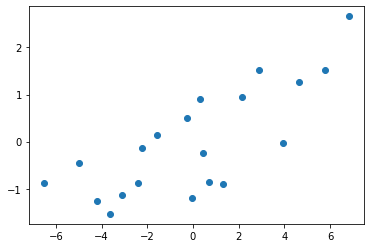

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[0], X[1])

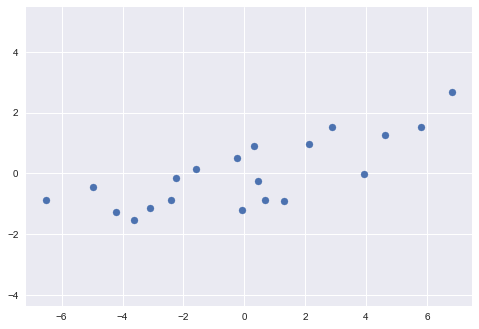

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# 第一個參數為所有的 xs, 第二個參數為所有的 ys
plt.scatter(X[0, :], X[1, :])
plt.axis('equal');

Resource : https://leemeng.tw/images/pca/Project2Dto1DEmbeddedNumberLine.mp4
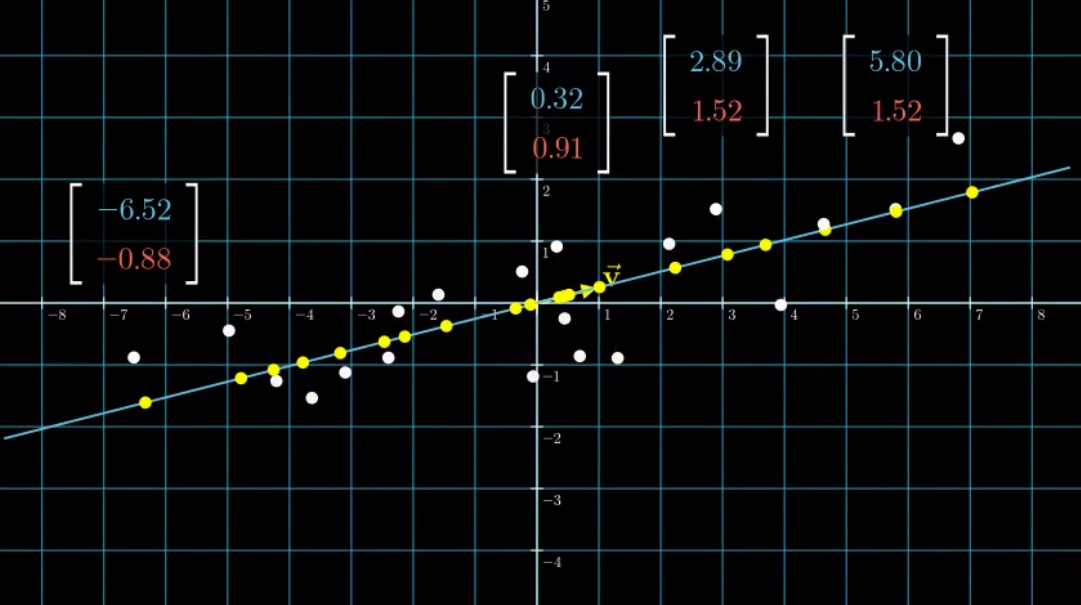

## 將原空間中的任一向量投影到某低維子空間，事實上就是在線性地降低其維度。
事實上這就是線性降維與 PCA 的核心精神：將原始數據拆解成更具代表性的主成分，並以其作為新的基準，重新描述數據。

In [10]:
# 該直線的單位向量（顯示到小數後第兩位）
v = np.array([0.9691344, 0.246533])
print("v       :", v)  # shape: (2,)
assert_almost_equal(1, np.linalg.norm(v))

# 使用 v 建立投影矩陣 Ｐ1
# 因為 P 是將 X 投影到 1 維，因此加個 1 在後面
P1 = v[np.newaxis, :]  # shape: (1, 2)
print("P1      :", P1)

# 利用 P1 將數據 X 投影到 v 所在子空間 
L = P1 @ X

# 前 4 個樣本的新特徵 L 跟動畫內結果相同
print("L[:, :4]:", L[:, :4])

v       : [0.97 0.25]
P1      : [[0.97 0.25]]
L[:, :4]: [[ 3.18  0.53  5.99 -6.53]]


# 跳脫你的慣性思維，x 軸並不一定得水平展開。
只要你想，這世上的任何直線都能是你的 x 軸。任何向量都可以是你描述手中數據的新基準。

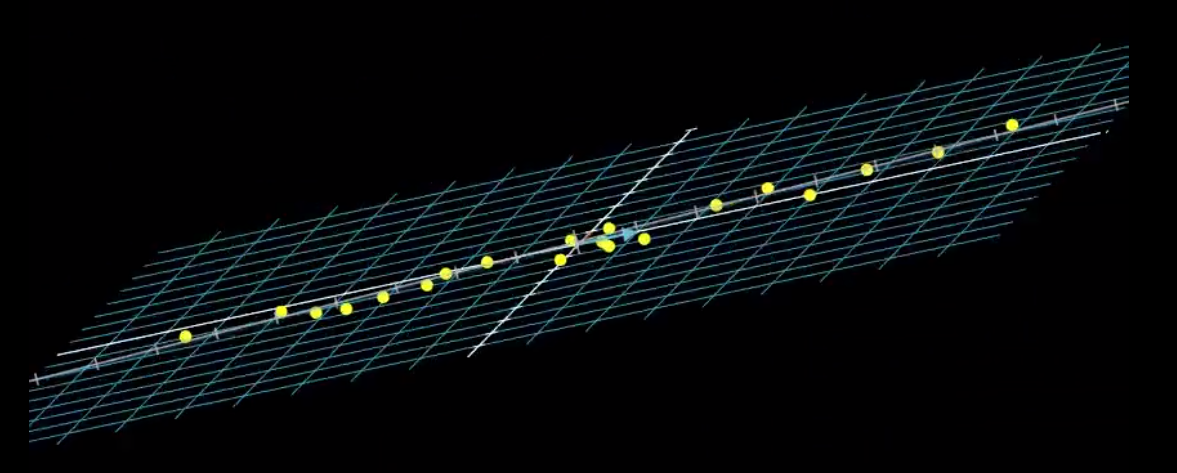


In [11]:
# PCA 是一種拆解並重新表述數據的技巧
from sklearn.decomposition import PCA

# 最大化 reproductivity
random_state = 9527

# 使用 sklearn 實作的 PCA 將數據 X 線性地降到 1 維
# 這邊值得注意的是 sklearn API 預期的輸入維度為
# (n_samples, n_features), 輸出自然也是。
pca_1d = PCA(1, random_state=random_state)
L_sk = pca_1d.fit_transform(X.T).T 
print('L_sk.shape:', L_sk.shape)
print('L_sk:', L_sk[:, :4])

# sklearn API 得到的結果跟我們手動計算結果相同
assert_almost_equal(L_sk, L)



L_sk.shape: (1, 20)
L_sk: [[ 3.18  0.53  5.99 -6.53]]


In [17]:
'''
我在前面就已經提過，多數 Python 機器學習函式庫的預期輸入都是 n_samples 優先。
這是為何在呼叫 scikit-learn 時我先轉置 X 使其維度變為 (n_samples, n_features)，
接著再將其結果轉置回我想要的 (n_transformed_features, n_samples)：
'''
L_sk = pca_1d.fit_transform(X.T).T
data = X.T
L_transpose = pca_1d.transform(data)
assert_almost_equal(L.T, L_transpose)
L

array([[ 3.18,  0.53,  5.99, -6.53,  3.81, -4.39,  0.37,  2.31,  1.04,
        -4.93, -2.54, -3.28,  0.46, -1.51, -3.9 , -0.11,  7.26,  4.81,
        -2.2 , -0.35]])

In [18]:
https://leemeng.tw/essence-of-principal-component-analysis.html

SyntaxError: invalid syntax (<ipython-input-18-68e1663ac9ca>, line 1)